# Importing some packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False,I know it's been a while since we did this sho...


In [3]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,1685609,38160,1385,2657,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,1064798,60008,382,3936,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,1066451,48068,1032,3992,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,5660813,192957,2846,13088,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,10306119,357079,212976,144795,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


In [4]:
print(df.shape)

(40949, 14)


We have 40949 rows and 16 columns in our dataset.

In [5]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

Checking the data types of columns.

# Data Cleaning

As we can see that trending_date and publish_time are not in proper format. So we are converting its datatype to datetime.

In [6]:
df['trending_date'] = pd.to_datetime(pd.Series(df['trending_date'].apply(lambda x:'20' + 
                                            x[0:2] + '.' + x[6:] + '.' + x[3:5])))
df['publish_time'] = pd.to_datetime(pd.Series(df['publish_time'].apply(lambda x:x[:19])))
df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [7]:
df.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
dtype: object

We converted the 'trending_date' and 'publish_time' columns to datetime

In [8]:
#Checking for null values
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
views                       0
likes                       0
dislikes                    0
comment_count               0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

As we can see 'description' column contains null values. For that case, we are dropping 'description' column.

In [9]:
df = df.drop(['description'], axis = 'columns')

In [10]:
#once again checking for null values
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

There are no null values in the entire dataset.

# Dataset collection years

Let's see in which years the dataset was collected

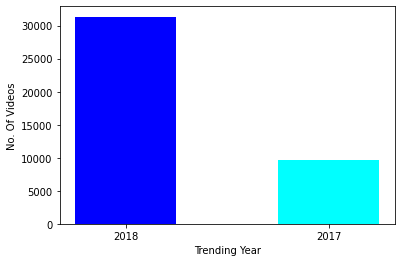

In [11]:
day = df['trending_date'].dt.strftime ('%Y')
my_dict = (day.value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()), 
                     columns = ['Trending year','No. Of Videos']) 
fig = plt.figure(figsize=(6,4))

plt.bar(count['Trending year'], count['No. Of Videos'], 
        color=['blue', 'cyan'], width=0.5)
plt.xlabel("Trending Year")
plt.ylabel("No. Of Videos")
plt.show()

Now we can see which days of the week had the largest number of trending videos

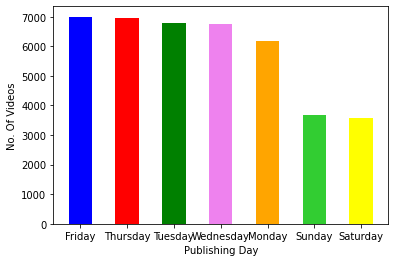

In [12]:
day = df['publish_time'].dt.day_name()
my_dict = (day.value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()), 
                     columns = ['Publishing Day', 'No. Of Videos']) 
fig = plt.figure(figsize=(6, 4))
plt.bar(count['Publishing Day'], count['No. Of Videos'], 
        color=['blue', 'red', 'green', 'violet', 'orange', 'limegreen',
               'yellow'], width=0.5)
plt.xlabel("Publishing Day")
plt.ylabel("No. Of Videos")
plt.show()

By observing the bar graph, we can see that the number of trending videos published on Sunday and Saturday are noticeably less than the number of trending videos published on other days of the week.

Now we can see which publishing hours have the largest number of trending videos

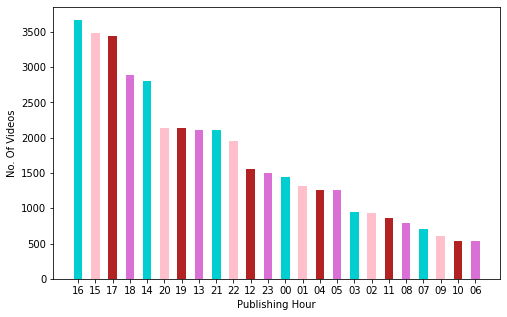

In [13]:
hour = df.publish_time.apply(lambda x: x.strftime("%H"))
my_dict = (hour.value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()), 
                     columns = ['Publishing Hour','No. Of Videos']) 

fig = plt.figure(figsize=(8,5))

plt.bar(count['Publishing Hour'], count['No. Of Videos'], 
        color=['DarkTurquoise', 'pink', 'firebrick', 'orchid'], width=0.5)
plt.xlabel("Publishing Hour")
plt.ylabel("No. Of Videos")
plt.show()

We can see that period between 3PM and 5PM has the largest number of trending videos. We also notice that the period between 6AM to 11AM has the smallest number of trending videos.

# Description of numerical columns

Now, let's see some statistical information about the numerical columns of our dataset.

In [14]:
pd.options.display.float_format = "{:.2f}".format
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


We note from the table above that:


The average number of views of a trending video is 2,360,784.
The median value for the number of views is 681,861, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
The average number of likes of a trending video is 74,266, while the average number of dislikes is 3,711. The Average comment count is 8,446 while the median is 1,856

# Plotting Histograms

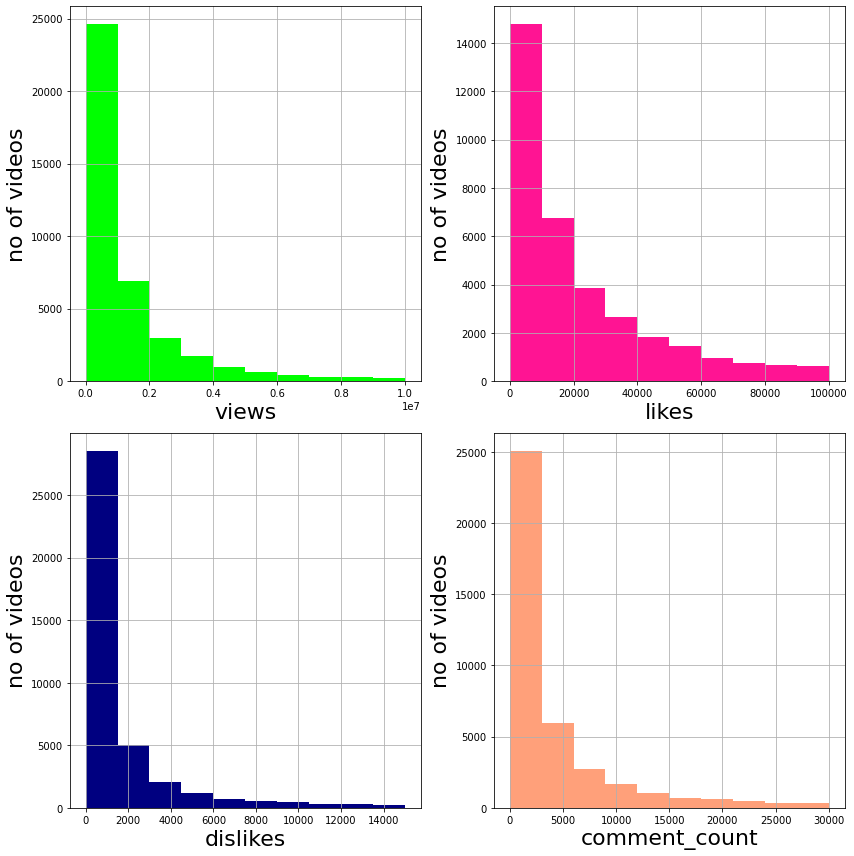

In [15]:
numerical=['views', 'likes', 'dislikes', 'comment_count']
color=['lime', 'deeppink', 'navy', 'lightsalmon']
r = [10000000,100000,15000,30000,40]
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
for var, i, j, subplot in zip(numerical, r, color, ax.flatten()):
    ax=df[df[var]<=i][var].hist(ax = subplot, color = j)
    ax.set_xlabel(var, fontsize = 22)
    ax.set_ylabel("no of videos", fontsize = 22)
fig.tight_layout()  

We can infer that majority of the videos that trend have 2 million views or less, 30k or less likes, 2000 or less dislikes and 5000 comments or less.

In [16]:
x=[2000000, 30000, 2000, 5000]
for i,j in zip(numerical, x):
    c=(df[i].loc[df[i]<=j].count()/df[i].count())*100
    print(i,":",c)

views : 76.9811228601431
likes : 62.003956140565094
dislikes : 75.49879117927178
comment_count : 72.26305892695792


We verified our above inference. 77% of our data trended with less than 2 million views, 62% of the videos that trended have 30k or less likes, 75% of the data have 2000 or less dislikes and 72% of the data have 5000 or less comments on the trended videos.

# Giving categories the names based on their category ID

In [17]:
df['category_id'].value_counts()

24    9964
10    6472
26    4146
23    3457
22    3210
25    2487
28    2401
1     2345
17    2174
27    1656
15     920
20     817
19     402
2      384
43      57
29      57
Name: category_id, dtype: int64

We made a new column 'category_name' containing the coressponding name of the category of the video.

In [18]:
df['category_name'] = np.nan
df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 43),"category_name"] = 'Shows'

In [19]:
df['category_name'].value_counts()

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News and Politics           2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Shows                         57
Non Profits and Activism      57
Name: category_name, dtype: int64

Now we can see which categories have the largest number of trending videos

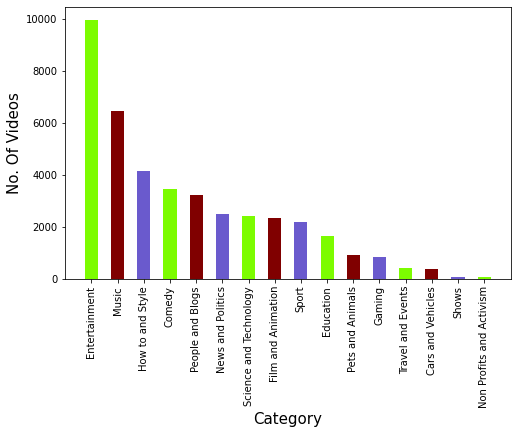

In [20]:
my_dict = (df['category_name'].value_counts()).to_dict()
count = pd.DataFrame(list(my_dict.items()),
                     columns = ['Category','No. Of Videos']) 
fig = plt.figure(figsize = (8,5))
plt.bar(count['Category'],count['No. Of Videos'], 
        color=['lawngreen', 'maroon', 'slateblue'], width=0.5)
plt.xticks(rotation = 90)
plt.xlabel("Category", size = 15)
plt.ylabel("No. Of Videos", size = 15)
plt.show()

We see that the Entertainment category contains the largest number of trending videos with around 10,000 videos, followed by Music category with around 6,200 videos, followed by How to & Style category with around 4,100 videos, and so on.

Now we will see which category has the maximum likes.

<ipython-input-21-2cb1cad656b1>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  c = a['category_name', 'likes'].max()


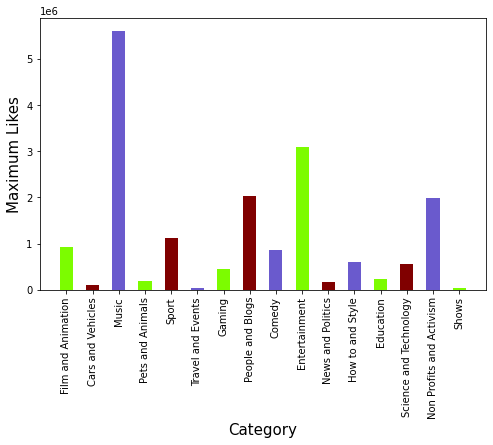

In [21]:
a = df.groupby('category_id')
c = a['category_name', 'likes'].max()
fig = plt.figure(figsize=(8,5))
plt.bar(c['category_name'], c['likes'], 
        color=['lawngreen', 'maroon', 'slateblue'], width = 0.5)
plt.xticks(rotation = 90)
plt.xlabel("Category", size = 15)
plt.ylabel("Maximum Likes", size = 15)
plt.show()

From the bar graph we can see that Music and Entertainment categories have the most no. of likes.

# Video title lengths

Let's add another column to our dataset to represent the length of each video title, then plot the histogram of title length to get an idea about the lengths of trending video titles

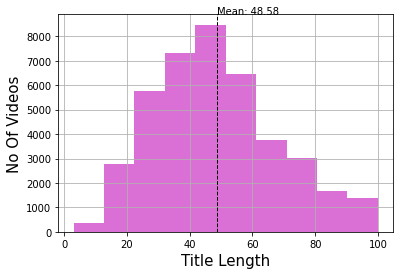

In [22]:
df["title_length"] = df["title"].apply(lambda x: len(x))
ax = df['title_length'].hist(color = "orchid")
ax.axvline(df['title_length'].mean(), color='k', 
           linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
ax.text(df['title_length'].mean(), max_ylim,
        'Mean: {:.2f}'.format(df['title_length'].mean()))
plt.xlabel("Title Length", fontsize = 15)
plt.ylabel("No Of Videos", fontsize = 15)
plt.show()

We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.



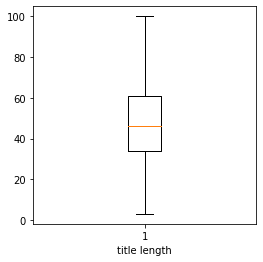

In [23]:
fig = plt.figure(figsize =(4, 4))
plt.boxplot(df.title_length)
plt.xlabel("title length")
plt.show()

Now let's draw a scatter plot between title length and number of likes to see the relationship between these two variables

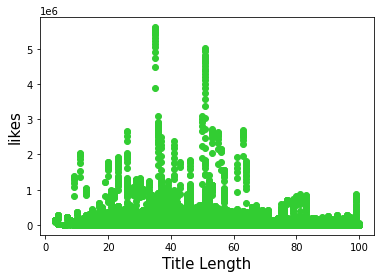

In [24]:
plt.scatter(df['title_length'],df['likes'],color="limegreen")
plt.xlabel("Title Length",size=15)
plt.ylabel("likes",size=15)
plt.show()

By looking at the scatter plot, we can say that there is no relationship between the title length and the number of likes.

# How many trending videos have an error?

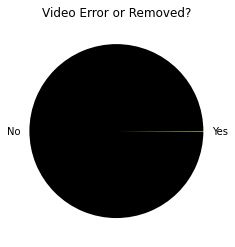

In [25]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], 
        labels=['No', 'Yes'], colors=['black', 'yellow'])
plt.title('Video Error or Removed?')
plt.show()

In [26]:
df["video_error_or_removed"].value_counts()

False    40926
True        23
Name: video_error_or_removed, dtype: int64

There are 23 videos in the entire dataset which contains error.

# How many trending videos have their comments disabled?

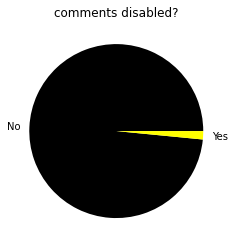

In [27]:
value_counts = df["comments_disabled"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], 
        labels=['No', 'Yes'], colors=['black', 'yellow'])
plt.title('comments disabled?')
plt.show()

In [28]:
df["comments_disabled"].value_counts()

False    40316
True       633
Name: comments_disabled, dtype: int64

There are 633 videos in the entire dataset whose comments were disabled.

# How many trending videos have their ratings disabled?

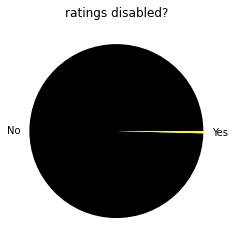

In [29]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
plt.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'],
        colors=['black', 'yellow'])
plt.title('ratings disabled?')
plt.show()

In [30]:
df["ratings_disabled"].value_counts()

False    40780
True       169
Name: ratings_disabled, dtype: int64

There are 169 videos whose rating are disabled.

# How many videos have both comments and ratings disabled?

In [31]:
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

106

106 no. of videos have their comments and rating disabled.

# Correlation

Checking out the Correlation between numerical columns.

In [32]:
correlation_list = ['views', 'likes', 'dislikes', 'comment_count']
data_corr = df[correlation_list].corr()
display(data_corr)

,views,likes,dislikes,comment_count
views,1.00,0.85,0.47,0.62
likes,0.85,1.00,0.45,0.80
dislikes,0.47,0.45,1.00,0.70
comment_count,0.62,0.80,0.70,1.00


<AxesSubplot:>

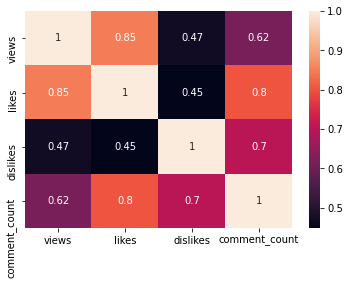

In [33]:
sns.heatmap(data_corr, annot = True)

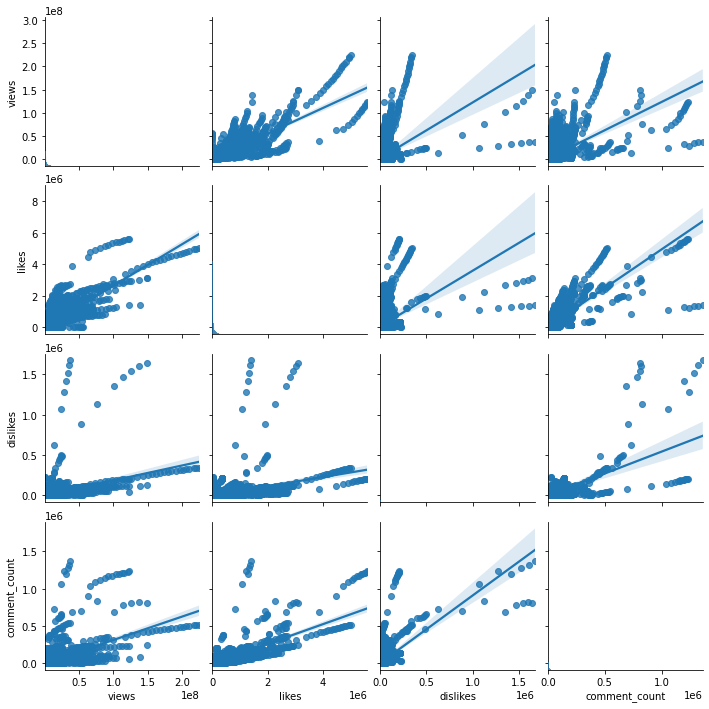

In [34]:
sns.pairplot(df[['views', 'likes', 'dislikes', 'comment_count']], 
             kind = 'reg' )

From the pairplot we can observe that likes and views have strong correlation as well as comment_count and likes

First, Plotting the correlation between likes and views.

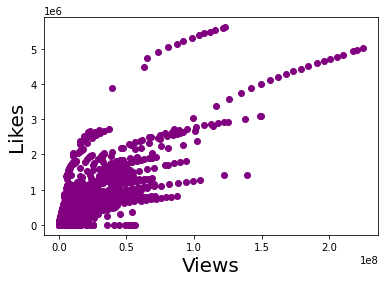

In [35]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(df['views'], df['likes'], color = 'purple')
plt.xlabel("Views", size=20)
plt.ylabel("Likes", size=20)
plt.show()

There is s strong linear relation between the no of views and the no of likes on a video. We see that views and likes are truly positively correlated: as one increases, the other increases too.

Now plotting the correlation between comment_count and likes.

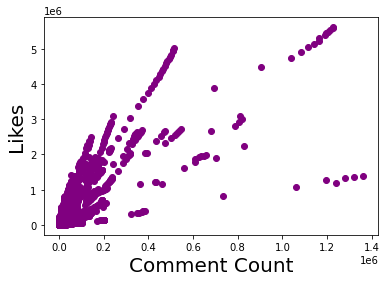

In [36]:
fig, ax = plt.subplots(figsize = (6, 4))
ax.scatter(df['comment_count'], df['likes'],  color = 'purple')
plt.xlabel("Comment Count", size=20)
plt.ylabel("Likes", size=20)
plt.show()

There is s strong linear relation between the no. of comments and the no of likes on a video. We see that comments and likes are truly positively correlated: as one increases, the other increases too. Though it contains some outliers.

# No. of videos published by particular channel

Here we are going to select channels who have publshed more than 50 trending videos.

In [37]:
c=df.channel_title.value_counts()
c=c[c>50]
c

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
                                         ... 
Lip Sync Battle                            52
Epicurious                                 52
Casey Holmes                               51
Jaiden Animations                          51
CBS Los Angeles                            51
Name: channel_title, Length: 203, dtype: int64

Putting all those channels in a list.

In [38]:
titles=list(c.index)
titles

['ESPN',
 'The Tonight Show Starring Jimmy Fallon',
 'TheEllenShow',
 'Vox',
 'Netflix',
 'The Late Show with Stephen Colbert',
 'Jimmy Kimmel Live',
 'Late Night with Seth Meyers',
 'Screen Junkies',
 'NBA',
 'CNN',
 'Saturday Night Live',
 'WIRED',
 'BuzzFeedVideo',
 'INSIDER',
 'The Late Late Show with James Corden',
 'TED-Ed',
 'Tom Scott',
 'WWE',
 'CollegeHumor',
 'HellthyJunkFood',
 'First We Feast',
 'Tasty',
 'Bon Appétit',
 'Warner Bros. Pictures',
 'FBE',
 'The King of Random',
 'Life Noggin',
 'jacksfilms',
 'Good Mythical Morning',
 'Vanity Fair',
 'Vogue',
 'Safiya Nygaard',
 'SciShow',
 '20th Century Fox',
 'Smosh',
 'Dude Perfect',
 'Marques Brownlee',
 'Great Big Story',
 'Marvel Entertainment',
 'AsapSCIENCE',
 'NFL',
 'ABC News',
 'The Slow Mo Guys',
 'The Voice',
 'James Charles',
 "Simon's Cat",
 'Washington Post',
 'CrazyRussianHacker',
 'Kurzgesagt – In a Nutshell',
 'Binging with Babish',
 'NikkieTutorials',
 'Complex',
 'E! Entertainment',
 'You Suck At Cooking

<b>Removing unnecessary columns to perform prediction.</b>

In [39]:
data=df[df['channel_title'].isin(titles)]
data=data.reset_index()
data.drop(['index', 'video_id', 'trending_date', 'title', 'category_id', 
            'title_length'], 
          axis = 1, inplace = True)
data

,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,CaseyNeistat,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,People and Blogs
1,Rudy Mancuso,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,Comedy
2,Good Mythical Morning,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,Entertainment
3,nigahiga,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,Entertainment
4,iJustine,2017-11-13 19:07:23,119180,9763,511,1434,False,False,False,Science and Technology
...,...,...,...,...,...,...,...,...,...,...
18799,Saturday Night Live,2018-05-20 04:58:51,8607264,66559,14179,8382,False,False,False,Entertainment
18800,Lucas the Spider,2018-05-19 14:52:43,8300584,266267,4237,14617,False,False,False,Film and Animation
18801,The Graham Norton Show,2018-05-18 17:13:08,5564576,46351,2295,2861,False,False,False,Entertainment
18802,BuzzFeed Celeb,2018-05-18 16:39:29,8259128,645888,4052,62610,False,False,False,People and Blogs


Perform <b>Label Encoder</b> to convert the labels into numeric form so as to convert it into machine readable form. 

In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data.columns:
    if i in ['channel_title','category_name', 'publish_time','comments_disabled',
           'ratings_disabled', 'video_error_or_removed']:
        data[i] = le.fit_transform(data[i])
data

,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,category_name
0,32,68,748374,57527,2966,15954,0,0,0,10
1,130,48,3191434,146033,5339,8181,0,0,0,1
2,60,56,343168,10172,666,2146,0,0,0,3
3,201,47,2095731,132235,1989,17518,0,0,0,3
4,196,71,119180,9763,511,1434,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...
18799,133,2850,8607264,66559,14179,8382,0,0,0,3
18800,98,2844,8300584,266267,4237,14617,0,0,0,4
18801,159,2831,5564576,46351,2295,2861,0,0,0,3
18802,22,2830,8259128,645888,4052,62610,0,0,0,10


Here, we are using 'likes' column as the target variable and remaining columns as feature variable.

In [41]:
X = data.drop('likes',axis=1)
y = data.likes

Applying <b>StandardScaler()</b> function to scale the values.

In [42]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)

In [43]:
X.head(5)

,0,1,2,3,4,5,6,7,8
0,-1.23,-1.98,-0.27,0.04,0.18,-0.09,-0.02,0.00,1.16
1,0.44,-2.00,0.20,0.34,-0.02,-0.09,-0.02,0.00,-1.22
2,-0.75,-1.99,-0.35,-0.24,-0.17,-0.09,-0.02,0.00,-0.69
3,1.64,-2.00,-0.01,-0.08,0.22,-0.09,-0.02,0.00,-0.69
4,1.56,-1.98,-0.40,-0.26,-0.19,-0.09,-0.02,0.00,1.69


In [44]:
y.head(5)

0     57527
1    146033
2     10172
3    132235
4      9763
Name: likes, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

We are splitting the dataset into 70% of training data and 30% of testing data.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                 random_state = 0)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (13162, 9)
X_test:  (5642, 9)
y_train:  (13162,)
y_test:  (5642,)


# Linear Regression

Applying linear regression to predict values.

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Applying linear regression model to predict values.

In [48]:
y_pred = model.predict(X_test)
y_pred

array([ 36528.48305523,  46546.1014853 , 127548.8128723 , ...,
       101928.3528423 ,  23979.04424468,  67452.44771214])

In [49]:
df_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_predict.head(10)

,Actual,Predicted
17199,33043,36528.48
13504,41068,46546.10
14071,198351,127548.81
11167,12549,32971.09
7712,508108,358583.63
18322,13749,29855.75
17737,23064,26604.97
8938,15224,27718.65
14285,19003,36060.88
11769,16905,30758.43


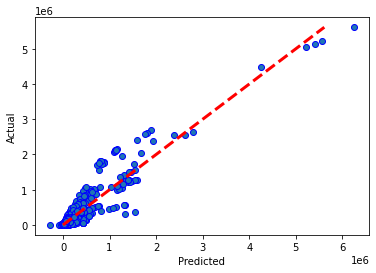

In [50]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

On this plot, we can check out where the points lie. We can see that points are very close to the diagonal line and we can conclude that the R2 score will be high. This shows us that the model fit the data very well.

In [51]:
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_pred))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_pred))

Mean Absolute Error on Testing Set:  32061.572955804317
R-Squared Score on Testing Set:  0.8822370522892313


# Ridge Regression

Applying ridge regression to predict the values.

In [52]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_ridge = ridge.predict(X_test)
y_ridge

array([ 36531.82758224,  46545.67784705, 127546.93502374, ...,
       101923.50089678,  23981.6161597 ,  67479.94088983])

In [53]:
df_ridge_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_ridge})
df_ridge_predict.head(10)

,Actual,Predicted
17199,33043,36531.83
13504,41068,46545.68
14071,198351,127546.94
11167,12549,32972.69
7712,508108,358556.68
18322,13749,29857.91
17737,23064,26605.39
8938,15224,27720.60
14285,19003,36060.52
11769,16905,30757.62


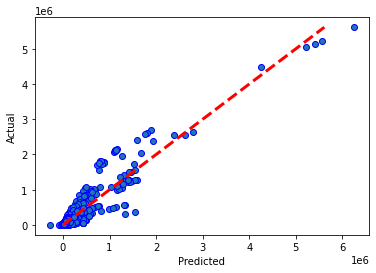

In [54]:
fig, ax = plt.subplots()
ax.scatter(y_ridge, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [55]:
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_ridge))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_ridge))

Mean Absolute Error on Testing Set:  32061.99452064951
R-Squared Score on Testing Set:  0.8822300347232459


# Lasso Regression

Applying lasso regression to predict values

In [56]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
y_lasso = lasso.predict(X_test)
y_lasso

array([ 36526.64543086,  46543.91932753, 127545.8647657 , ...,
       101928.67565123,  23978.20066999,  67453.55646353])

In [57]:
df_ridge_predict = pd.DataFrame({'Actual': y_test, 'Predicted': y_lasso})
df_ridge_predict.head(10)

,Actual,Predicted
17199,33043,36526.65
13504,41068,46543.92
14071,198351,127545.86
11167,12549,32968.55
7712,508108,358589.43
18322,13749,29853.21
17737,23064,26603.58
8938,15224,27717.82
14285,19003,36062.01
11769,16905,30759.50


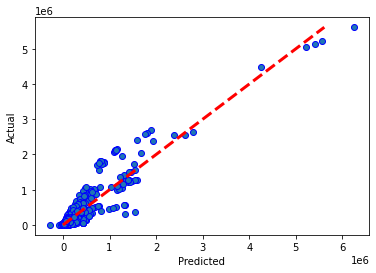

In [58]:
fig, ax = plt.subplots()
ax.scatter(y_lasso, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [59]:
print("Mean Absolute Error on Testing Set: ", mean_absolute_error(y_test, 
                                                                  y_lasso))
print("R-Squared Score on Testing Set: ", r2_score(y_test,y_lasso))

Mean Absolute Error on Testing Set:  32061.38655658877
R-Squared Score on Testing Set:  0.8822364356916377


# Conclusion

As we see that, we are getting 88.22% r2 score for all the three forms of regression.

<b>So we can conclude that we can use any of the above regression technique to predict the <i>'likes'</i> of trending videos in our above dataset.</b>